In [1]:
# importing the required necessities.
import numpy as np # linear algebra
import pandas as pd 

import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img

In [2]:
directory = '/kaggle/input/plantdisease/PlantVillage'

In [3]:
IMG_SHAPE = (256, 256)
INPUT_SHAPE = [256, 256, 3]
BS = 32

In [4]:
from glob import glob
# useful for getting number of output classes
folders = glob('/kaggle/input/plantdisease/PlantVillage/*')
print(len(folders))

15


In [5]:
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2, validation_split=0.1)

train_data_gen = img_data_gen.flow_from_directory(directory, batch_size=BS, subset='training', 
                                                  class_mode='categorical', shuffle=True) 

val_data_gen = img_data_gen.flow_from_directory(directory, batch_size=BS, subset='validation', 
                                                  class_mode='categorical', shuffle=True) 

Found 18580 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [6]:
label = train_data_gen.class_indices
label

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

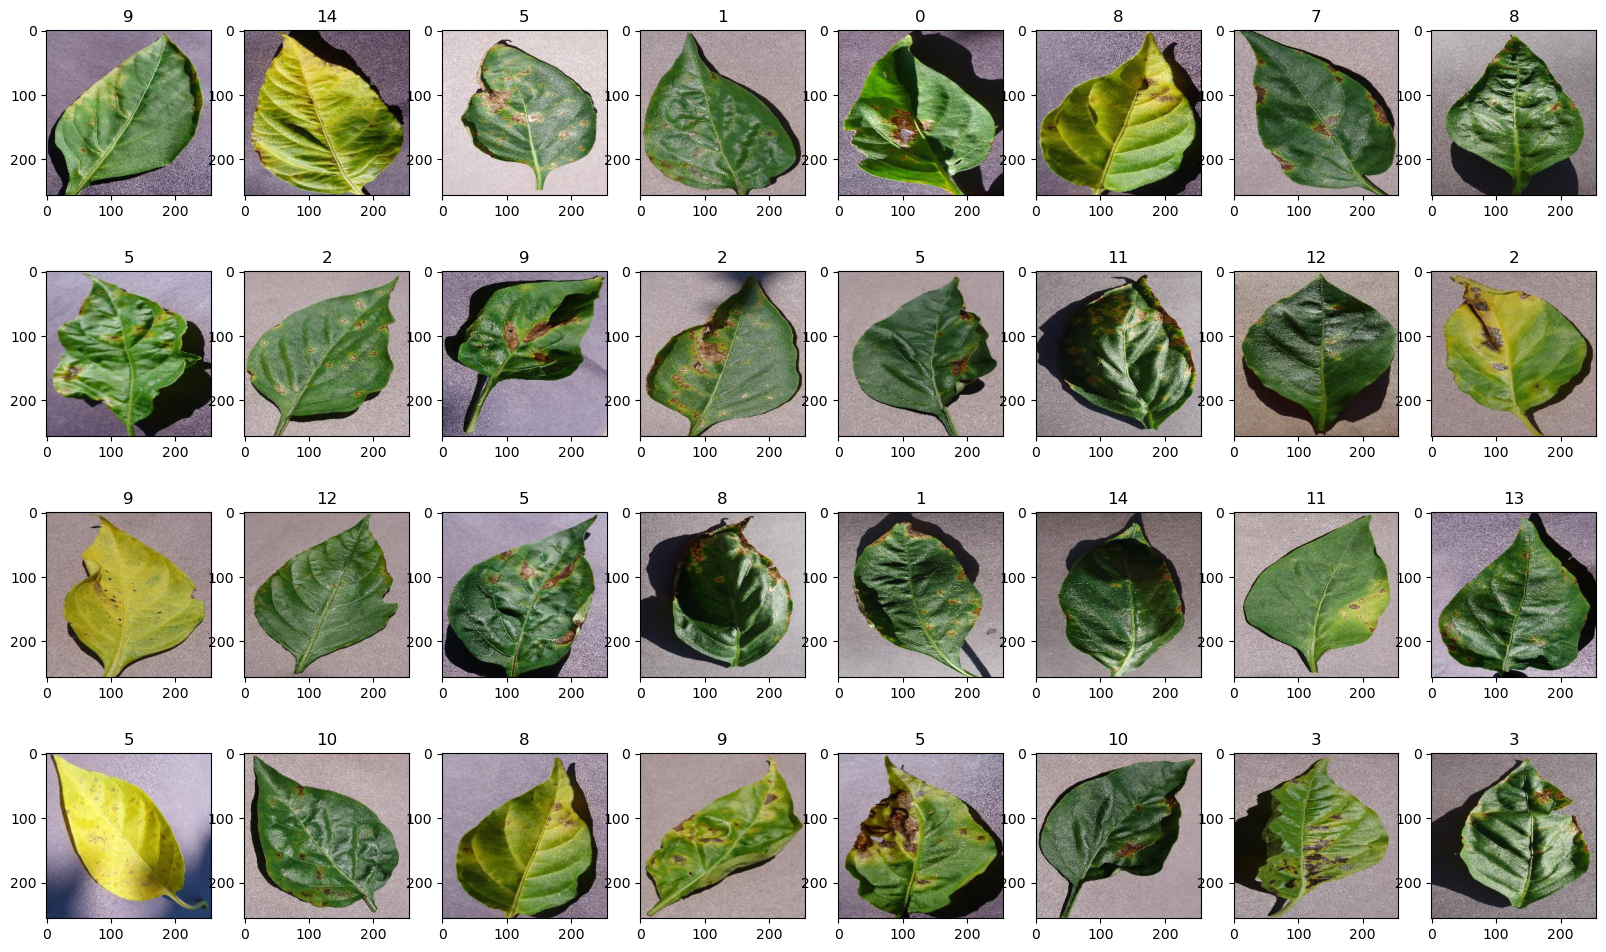

In [7]:
import matplotlib.pyplot as plt
import os
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(20,12))
axs = axs.flatten()

for images, labels in train_data_gen:
    for i in range(len(images)):
        img = load_img(os.path.join(directory, train_data_gen.filenames[train_data_gen.batch_index*32 + i]))
        axs[i].imshow(img)
        axs[i].set_title(np.argmax(labels[i]))
    break

In [8]:
# importing the pre trained model

conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
conv_base.trainable = False

In [10]:
#resizing layer
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(256,256),
])

In [11]:
# adding my layers

model = Sequential()
model.add(resize)
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(len(folders),activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

Epoch 1/20
581/581 [==============================] - 439s 742ms/step - loss: 0.8885 - accuracy: 0.7187 - val_loss: 0.4821 - val_accuracy: 0.8319
Epoch 2/20
581/581 [==============================] - 336s 579ms/step - loss: 0.4417 - accuracy: 0.8520 - val_loss: 0.4171 - val_accuracy: 0.8533
Epoch 3/20
581/581 [==============================] - 341s 588ms/step - loss: 0.3337 - accuracy: 0.8847 - val_loss: 0.3689 - val_accuracy: 0.8659
Epoch 4/20
581/581 [==============================] - 336s 579ms/step - loss: 0.2929 - accuracy: 0.8992 - val_loss: 0.3663 - val_accuracy: 0.8790
Epoch 5/20
581/581 [==============================] - 337s 580ms/step - loss: 0.2588 - accuracy: 0.9120 - val_loss: 0.3294 - val_accuracy: 0.8882
Epoch 6/20
581/581 [==============================] - 354s 609ms/step - loss: 0.2298 - accuracy: 0.9206 - val_loss: 0.3262 - val_accuracy: 0.8907
Epoch 7/20
581/581 [==============================] - 348s 599ms/step - loss: 0.2149 - accuracy: 0.9247 - val_loss: 0.2795 -

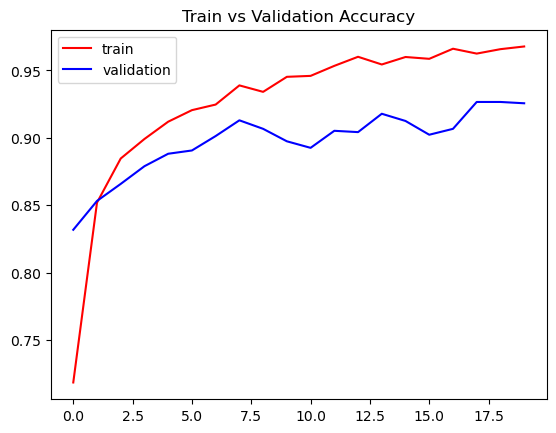

In [14]:
import matplotlib.pyplot as plt

plt.title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

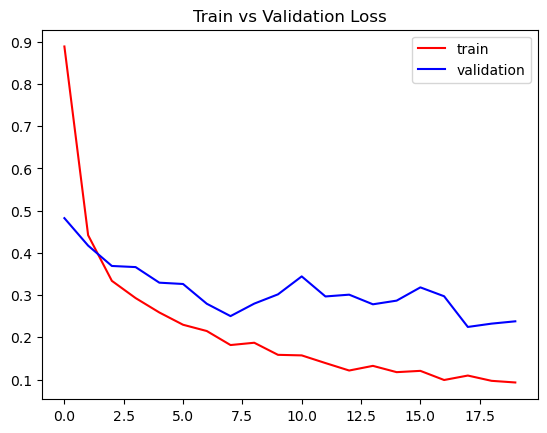

In [15]:
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.models import load_model

model.save('vg_final.h5')